In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Descision Tree Classifier

In [26]:
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [28]:
# Target feature on this dataset- which will be our dependent feature
# setos, vricicolor, virginica
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
# Independent feature
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
Y = iris['target']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.31, random_state=42)

#### In Descision we dont reuire Normalization or Standardization, It will be already taken care by Descision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
treeclassifiier = DecisionTreeClassifier()

In [33]:
treeclassifiier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [34]:
#Visualize the Descision Tree
from sklearn.tree import plot_tree

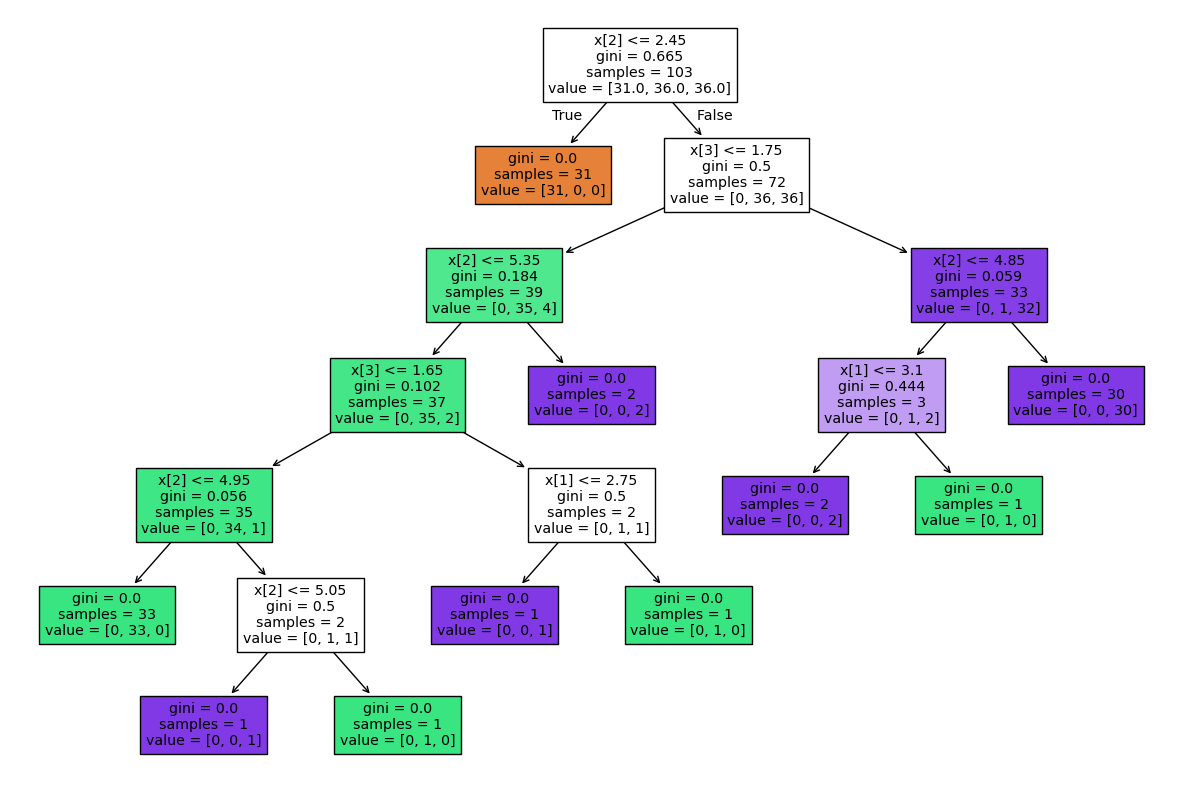

In [35]:
plt.figure(figsize=(15,10))  # Optional, for a bigger view
plot_tree(treeclassifiier, filled=True)
plt.show()

In [36]:
y_pred = treeclassifiier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(Y_test, y_pred)
print('Score: ',score)
print('Score in pcnt:', score * 100, '%')
cm = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix: \n',cm)
cr = classification_report(Y_test, y_pred)
print('Report:\n',cr)

Score:  0.9787234042553191
Score in pcnt: 97.87234042553192 %
Confusion Matrix: 
 [[19  0  0]
 [ 0 14  0]
 [ 0  1 13]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.96        14

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



## Hyperparamter Tuning - Classifier Pre Pruning

In [37]:
params= {
    'criterion': ["entropy","log_loss", "gini"],
    'splitter': ["best", "random"],
    'max_depth': [1,3, 5],
    'max_features': ["sqrt", "log2"]
}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'log_loss', 'gini'],
                         'max_depth': [1, 3, 5],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [40]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [41]:
grid.best_score_

np.float64(0.9419047619047619)

In [42]:
y_pred_grid = grid.predict(X_test)

score = accuracy_score(Y_test, y_pred_grid)
print('Score: ',score)
print('Score in pcnt:', score * 100, '%')
cm = confusion_matrix(Y_test, y_pred_grid)
print('Confusion Matrix: \n',cm)
cr = classification_report(Y_test, y_pred_grid)
print('Report:\n',cr)

Score:  0.9361702127659575
Score in pcnt: 93.61702127659575 %
Confusion Matrix: 
 [[19  0  0]
 [ 0 12  2]
 [ 0  1 13]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.86      0.89        14
           2       0.87      0.93      0.90        14

    accuracy                           0.94        47
   macro avg       0.93      0.93      0.93        47
weighted avg       0.94      0.94      0.94        47



In [43]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
y_pred = tree_regressor.predict(X_test)
# Score
print("MAE:",mean_absolute_error(Y_test, y_pred))
print("MSE:",mean_squared_error(Y_test, y_pred))
print("R2 Score:",r2_score(Y_test, y_pred))

MAE: 0.02127659574468085
MSE: 0.02127659574468085
R2 Score: 0.9692005242463958
